<a href="https://colab.research.google.com/github/abdelrahmanMahmoud355/Electro_Pi_Projects/blob/main/Customer_Segmentation_for_E-commerc_%20Personalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
data = pd.read_excel("/content/sample_data/Online Retail.xlsx") #Loading Data

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df = data.copy() # Make a Copy For The Data

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
df.info() #Show The Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
df.describe(include=["object"])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [20]:
#CLeaning The Data

In [21]:
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [24]:
df.shape

(406829, 8)

In [25]:
df.duplicated().sum() #Check Duplicated


5225

In [26]:
df.drop_duplicates(inplace=True,keep="first")

In [27]:
df.duplicated().sum()

0

In [28]:
df["total_price"] = df["UnitPrice"]*df["Quantity"] #represents the total price for each unique quantity of products sold.


<Axes: >

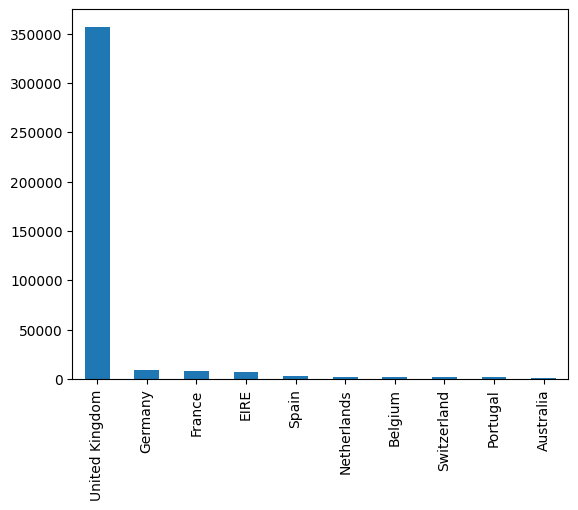

In [29]:
df['Country'].value_counts().head(10).plot(kind = 'bar') #Counting the Country


In [30]:
last_date = dt.datetime(2011, 12, 10)

# Calculate Recency, Frequency, Monetary values
def calculate_rfm(row):
    recency = (last_date - row['InvoiceDate'].max()).days
    frequency = row['InvoiceNo'].count()
    monetary = row['total_price'].sum()
    return pd.Series({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Group data by CustomerID and calculate RFM values
RFM_data = df.groupby("CustomerID").apply(calculate_rfm).reset_index()

# Print the resulting DataFrame
print(RFM_data.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0    325.0        2.0      0.00
1     12347.0      2.0      182.0   4310.00
2     12348.0     75.0       31.0   1797.24
3     12349.0     18.0       73.0   1757.55
4     12350.0    310.0       17.0    334.40


In [31]:
RFM_data=RFM_data.drop(columns=["CustomerID"]) #dropin customer ID


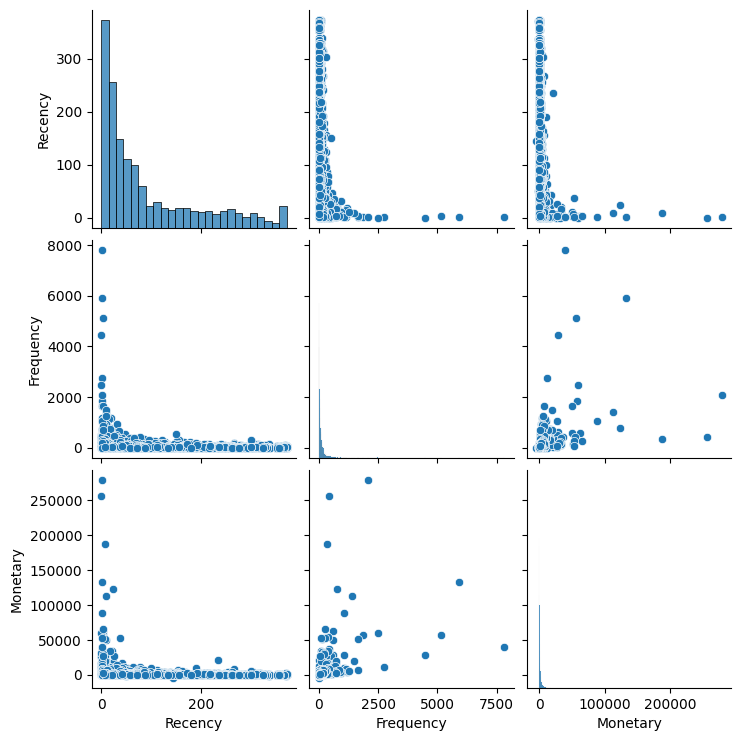

In [32]:
sns.pairplot(RFM_data) #plotting Recency, Frequency, Monetary


In [34]:
scl = StandardScaler() # convert the scale of the date before entering the model
rfm_scl = scl.fit_transform(RFM_data)
rfm_scl

array([[ 2.31656788, -0.39205597, -0.23041952],
       [-0.88904975,  0.39329343,  0.29405454],
       [-0.16456032, -0.26552745, -0.01171748],
       ...,
       [-0.83942719, -0.34406239, -0.20892947],
       [-0.87912524,  2.74497857,  0.01849636],
       [-0.49206924, -0.09536842, -0.00684511]])

In [35]:
pca = PCA()  #Dimensionality Reduction with PCA
rfm_pca = pca.fit_transform(rfm_scl)


In [36]:
pca.components_


array([[-0.39891318,  0.66325102,  0.63321904],
       [ 0.90707486,  0.18414474,  0.37855767],
       [ 0.13447481,  0.72538872, -0.67507609]])

In [37]:
pca.explained_variance_ratio_


array([0.51800815, 0.30096349, 0.18102837])

In [38]:
pca.get_feature_names_out()


array(['pca0', 'pca1', 'pca2'], dtype=object)

In [39]:
inertia = {}
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(rfm_scl)
    inertia[n_clusters] = kmeans.inertia_

Text(0, 0.5, 'error')

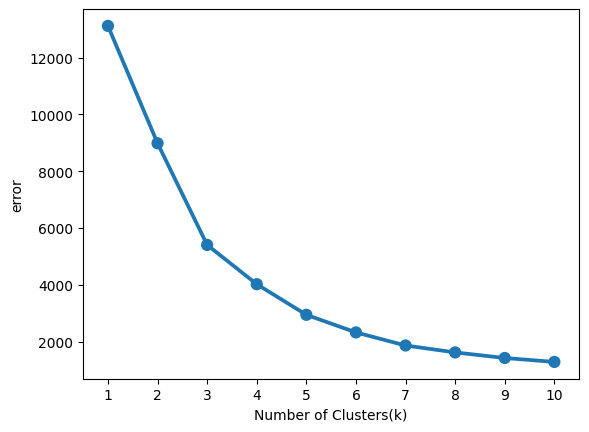

In [40]:
sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))  #plotting Elbow to determine the suitable number of cluster
plt.xlabel('Number of Clusters(k)')
plt.ylabel('error')

In [41]:
kmeans = KMeans(n_clusters=5, n_init=10)
preds = kmeans.fit_predict(rfm_scl)
RFM_data['NO_clusters'] = kmeans.labels_ +1
RFM_data


,Recency,Frequency,Monetary,NO_clusters
0,325.0,2.0,0.00,5
1,2.0,182.0,4310.00,1
2,75.0,31.0,1797.24,1
3,18.0,73.0,1757.55,1
4,310.0,17.0,334.40,5
...,...,...,...,...
4367,277.0,10.0,180.60,5
4368,180.0,7.0,80.82,5
4369,7.0,13.0,176.60,1
4370,3.0,721.0,2045.53,4


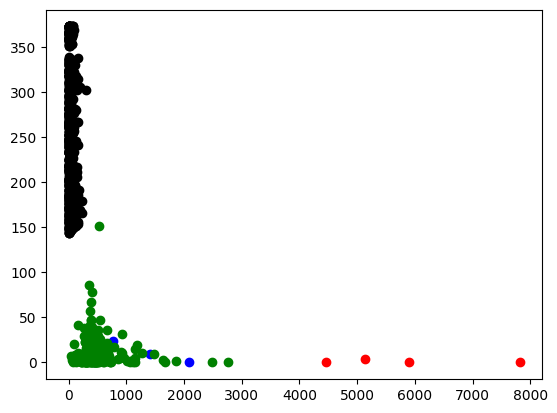

In [42]:
plt.scatter(RFM_data.iloc[preds==1,1],RFM_data.iloc[preds==1,0], color='red')
plt.scatter(RFM_data.iloc[preds==2,1],RFM_data.iloc[preds==2,0], color='blue')
plt.scatter(RFM_data.iloc[preds==3,1],RFM_data.iloc[preds==3,0], color='green')
plt.scatter(RFM_data.iloc[preds==4,1],RFM_data.iloc[preds==4,0], color='black')
plt.scatter(RFM_data.iloc[preds==5,1],RFM_data.iloc[preds==5,0], color='cyan')